<a href="https://colab.research.google.com/github/lmkelly16/BYU-REU-2022/blob/main/ZOI_44_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Imports
import pandas as pd
import numpy as np
import glob
import gdal

# Our image processing tools
import skimage.filters
import skimage.io
import skimage.morphology

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#import it
img_list = glob.glob('/content/drive/MyDrive/BYU_REU_images/*Z44C.tiff')

#sort it
img_list = np.sort(img_list)

#check to make sure it looks right
img_list

array(['/content/drive/MyDrive/BYU_REU_images/1Z44C.tiff'], dtype='<U48')

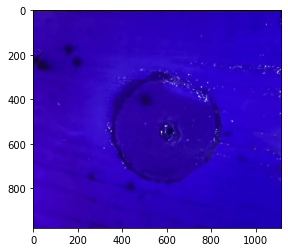

In [4]:
# Load the phase contrast image.
im = skimage.io.imread(img_list[0])

# look at it
plt.imshow(im);

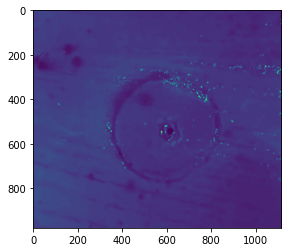

In [5]:
# see how good the contrast is
cim = im[:,:,0]
plt.imshow(cim);

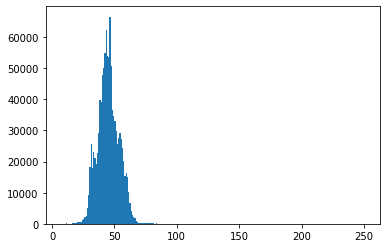

In [6]:
# forcing bins to be discretized by integer value
bins = np.arange(cim.min(), cim.max(), 1)

# plot histogram
plt.hist(cim.flatten(), bins=bins);

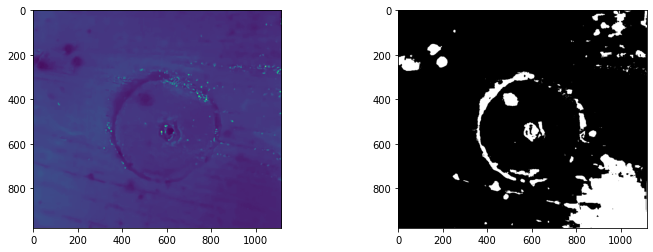

In [7]:
''' Thresholding '''
# Threshold value, as obtained by eye
im_thresh = 35

# Generate thresholded image
im_bw = cim < im_thresh

# plot orginal and thresholded next to each other
fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].imshow(cim)
ax[1].imshow(im_bw, cmap=plt.cm.gray);